In [1]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8")) #check the files available in the directory

data_description.txt
sample_submission.csv
test.csv
train.csv



In [140]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [141]:
integer = []
for c in train.columns:
    if train[c].dtype != 'object':
        integer.append(c)

In [142]:
def get_data_dist(name):
    print(name)
    plt.figure(figsize=(8, 6))
    sns.distplot(train[name], fit=norm)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(train[name], train['SalePrice'])
    
    plt.figure(figsize=(8, 6))
    stats.probplot(train[name], plot=plt, )

In [143]:
print("The origin train shape is ", train.shape)
print("The origin test shape is ", test.shape)

('The origin train shape is ', (1460, 81))
('The origin test shape is ', (1459, 80))


In [144]:
train_id = train['Id']
test_id = test['Id']

In [145]:
train.drop('Id', axis=1, inplace=True)

In [146]:
test.drop('Id', axis=1, inplace=True)

# data processing

## Outliers

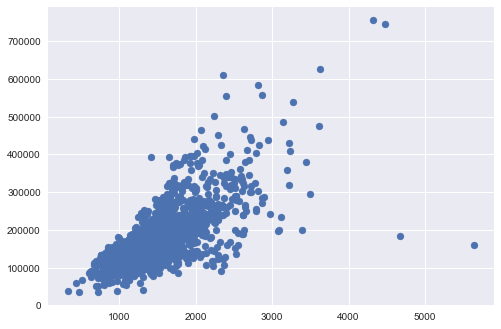

In [148]:
plt.scatter(train['GrLivArea'], train['SalePrice'])

# 去除异常点

In [151]:
train.drop(train[(train.SalePrice < 2e5) & (train.GrLivArea > 4000)].index, axis=0, inplace=True)

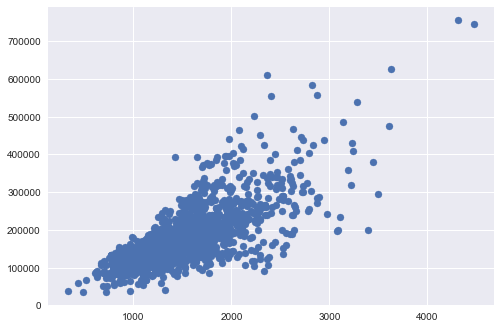

In [152]:
plt.scatter(x=train.GrLivArea, y=train.SalePrice)

## Target Variable¶

SalePrice is the variable we need to predict. So let's do some analysis on this variable first.

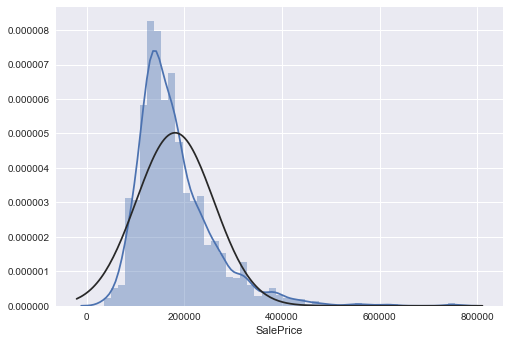

In [153]:
sns.distplot(train['SalePrice'] , fit=norm);


In [166]:
(mu, sigma) = norm.fit(train["SalePrice"])

In [167]:
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))



 mu = 180932.92 and sigma = 79467.79



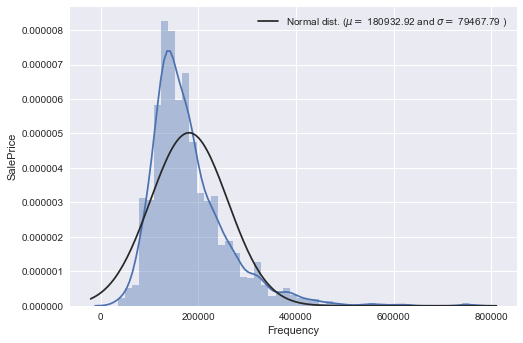

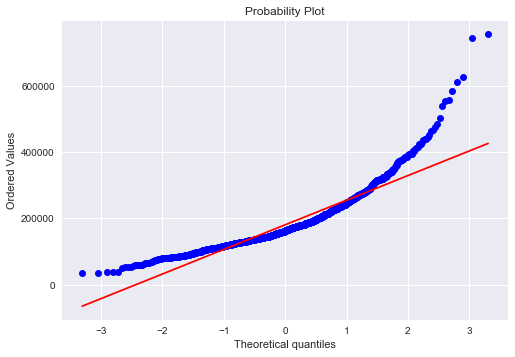

In [169]:
sns.distplot(train['SalePrice'] , fit=norm);

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.xlabel('Frequency')
plt.ylabel('SalePrice')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)


In [170]:
train["SalePrice"] = np.log1p(train["SalePrice"])



 mu = 12.02 and sigma = 0.40



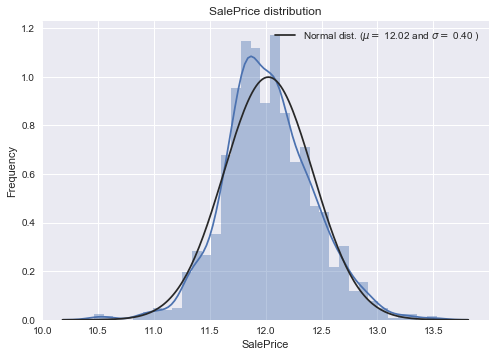

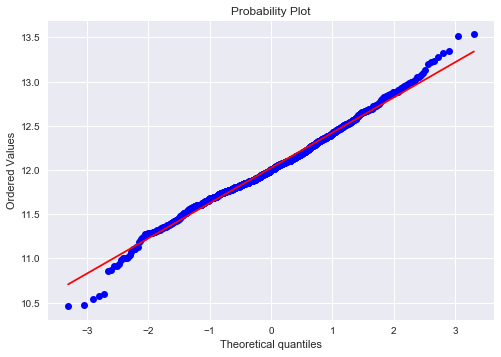

In [171]:
#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [172]:
train.to_csv('train_with_data_clean.csv', index=False)


In [173]:
test.to_csv('test_with_data_clean.csv', index=False)